In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline


In [2]:
import tensorflow
print (tensorflow.__version__)

2.3.1


Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


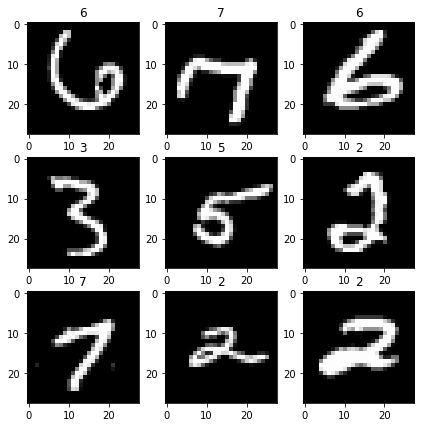

In [3]:
from tensorflow.keras.datasets import mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))

plt.figure(figsize=(7, 7))
for j in range(9):
    i = np.random.randint(0, 10000)
    plt.subplot(330 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainY[i])
plt.show()

In [4]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Generator Model

In [5]:
random_input = tensorflow.keras.layers.Input(shape = 50)

x = tensorflow.keras.layers.Dense(28*28, activation='relu')(random_input)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 784)               39984     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 1)         0         
Total params: 39,984
Trainable params: 39,984
Non-trainable params: 0
_________________________________________________________________


# Discriminator

In [6]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(512, activation='relu')(x)
x = tensorflow.keras.layers.Dense(256, activation='relu')(x)
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [7]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# GAN

In [8]:
discriminator_network.trainable=False

gan_input = generator_network(random_input)
gan_output = discriminator_network(gan_input)

gan_model = tensorflow.keras.models.Model(random_input, gan_output)
gan_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
functional_1 (Functional)    (None, 28, 28, 1)         39984     
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 566273    
Total params: 606,257
Trainable params: 39,984
Non-trainable params: 566,273
_________________________________________________________________


# Compiling Models

In [9]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [10]:
# Indices of Zero Images
#indices = list(np.where(trainY==0)[0])
indices = [i for i in range(60000)]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    fake_samples = get_fake_samples(generator_network, 10, noise_size)

    plt.figure(figsize=(7, 7))
    for j in range(9):
        i = j
        plt.subplot(330 + 1 + j)
        plt.imshow(fake_samples[i,:,:,-1], cmap='gray')
    plt.show()
    return

# Training GAN

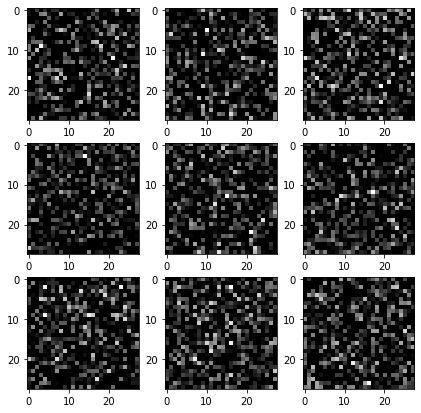

Epoch:0, Step:0, D-Loss:0.811, D-Acc:49.000, G-Loss:0.599
Epoch:0, Step:50, D-Loss:0.008, D-Acc:100.000, G-Loss:5.356
Epoch:0, Step:100, D-Loss:0.002, D-Acc:100.000, G-Loss:6.873
Epoch:0, Step:150, D-Loss:0.001, D-Acc:100.000, G-Loss:7.918
Epoch:0, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:8.710
Epoch:0, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:9.314
Epoch:0, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:9.778
Epoch:0, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:10.151
Epoch:0, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:10.524
Epoch:0, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:10.792
Epoch:1, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:11.055
Epoch:1, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:11.255
Epoch:1, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:11.528
Epoch:1, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:11.773
Epoch:1, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:11.948
Epoch:1, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:12.118
Epoch:1, Step:300, D-L

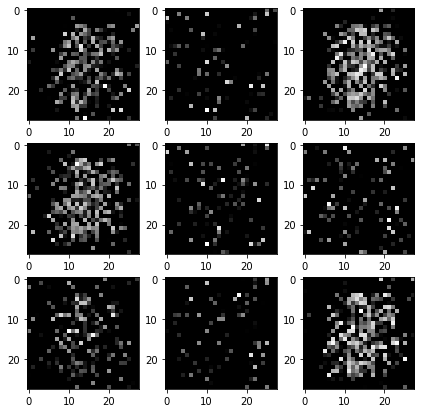

Epoch:5, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:15.612
Epoch:5, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:15.558
Epoch:5, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:15.544
Epoch:5, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:15.750
Epoch:5, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:15.868
Epoch:5, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:15.838
Epoch:5, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:15.859
Epoch:5, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:15.948
Epoch:5, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:15.997
Epoch:5, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:16.057
Epoch:6, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:16.015
Epoch:6, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:16.127
Epoch:6, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:16.145
Epoch:6, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:16.145
Epoch:6, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:16.200
Epoch:6, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:16.257
Epoch:6, Step:

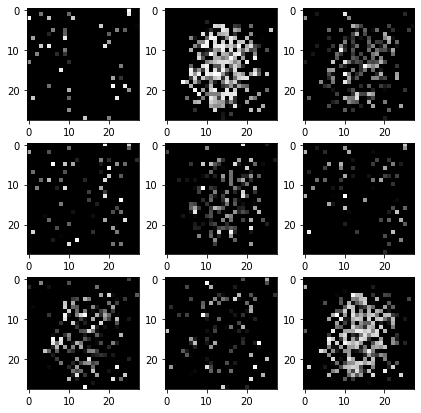

Epoch:10, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:17.676
Epoch:10, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:17.703
Epoch:10, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:17.651
Epoch:10, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:17.674
Epoch:10, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:17.712
Epoch:10, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:17.884
Epoch:10, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:17.841
Epoch:10, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:17.705
Epoch:10, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:17.843
Epoch:10, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:17.845
Epoch:11, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:17.849
Epoch:11, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:17.951
Epoch:11, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:17.985
Epoch:11, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:18.061
Epoch:11, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:17.942
Epoch:11, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:18.01

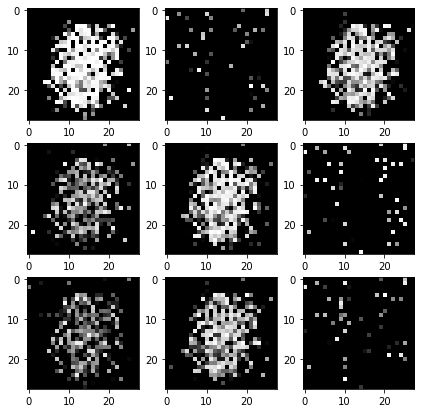

Epoch:15, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:19.253
Epoch:15, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:19.234
Epoch:15, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:19.221
Epoch:15, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:19.153
Epoch:15, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:19.233
Epoch:15, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:19.296
Epoch:15, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:19.227
Epoch:15, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:19.191
Epoch:15, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:19.367
Epoch:15, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:19.456
Epoch:16, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:19.408
Epoch:16, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:19.447
Epoch:16, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:19.457
Epoch:16, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:19.544
Epoch:16, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:19.528
Epoch:16, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:19.66

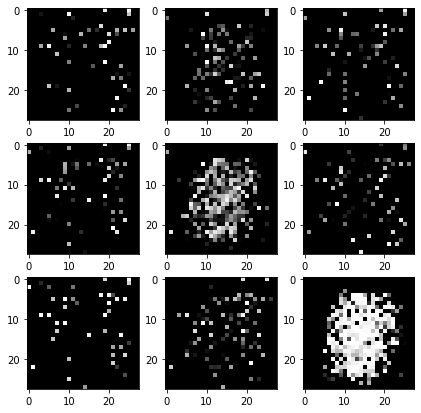

Epoch:20, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:20.398
Epoch:20, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:20.288
Epoch:20, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:20.471
Epoch:20, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:20.507
Epoch:20, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:20.499
Epoch:20, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:20.501
Epoch:20, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:20.536
Epoch:20, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:20.680
Epoch:20, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:20.472
Epoch:20, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:20.423
Epoch:21, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:20.454
Epoch:21, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:20.525
Epoch:21, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:20.557
Epoch:21, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:20.774
Epoch:21, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:20.675
Epoch:21, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:20.65

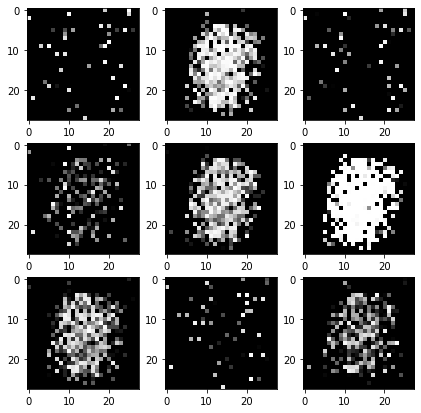

Epoch:25, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:21.263
Epoch:25, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:21.050
Epoch:25, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.449
Epoch:25, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:21.519
Epoch:25, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:21.335
Epoch:25, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:21.353
Epoch:25, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:21.384
Epoch:25, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:21.548
Epoch:25, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:21.465
Epoch:25, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:21.456
Epoch:26, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:21.492
Epoch:26, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:21.338
Epoch:26, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.530
Epoch:26, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:21.531
Epoch:26, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:21.477
Epoch:26, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:21.54

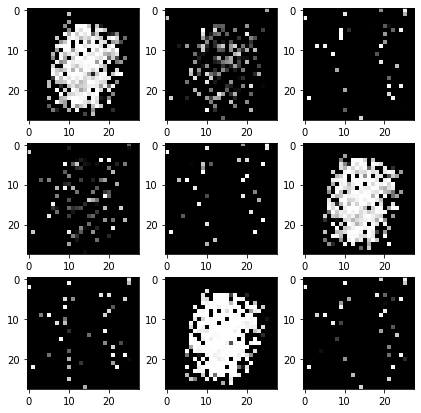

Epoch:30, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.087
Epoch:30, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.157
Epoch:30, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.943
Epoch:30, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.130
Epoch:30, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.076
Epoch:30, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.023
Epoch:30, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:22.130
Epoch:30, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:22.087
Epoch:30, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:22.012
Epoch:30, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:22.118
Epoch:31, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.272
Epoch:31, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.150
Epoch:31, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.178
Epoch:31, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.198
Epoch:31, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.269
Epoch:31, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.19

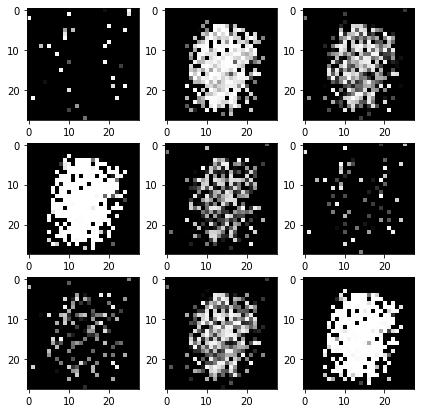

Epoch:35, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.576
Epoch:35, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.739
Epoch:35, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.638
Epoch:35, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.632
Epoch:35, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.484
Epoch:35, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.716
Epoch:35, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:22.670
Epoch:35, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:22.534
Epoch:35, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:22.741
Epoch:35, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:22.832
Epoch:36, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.734
Epoch:36, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.696
Epoch:36, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.629
Epoch:36, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.790
Epoch:36, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.694
Epoch:36, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.74

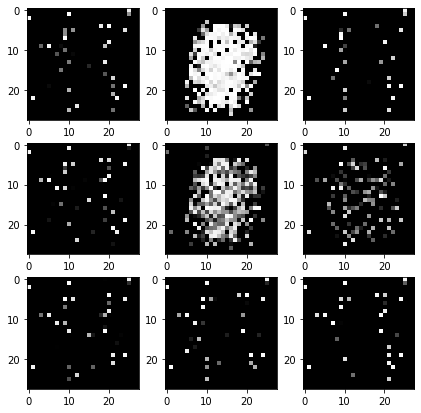

Epoch:40, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.065
Epoch:40, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.229
Epoch:40, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.019
Epoch:40, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.131
Epoch:40, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.976
Epoch:40, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.928
Epoch:40, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.078
Epoch:40, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:22.973
Epoch:40, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.006
Epoch:40, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:23.171
Epoch:41, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.978
Epoch:41, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.204
Epoch:41, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.989
Epoch:41, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.391
Epoch:41, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.159
Epoch:41, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.11

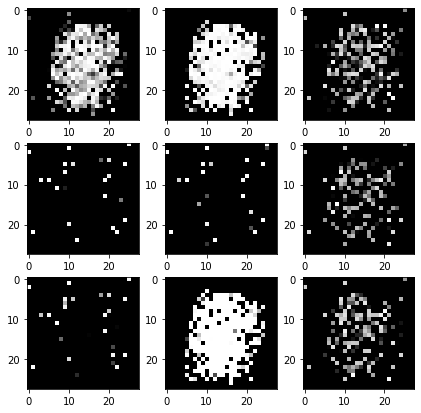

Epoch:45, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.555
Epoch:45, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.499
Epoch:45, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.373
Epoch:45, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.526
Epoch:45, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.410
Epoch:45, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.453
Epoch:45, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.421
Epoch:45, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:23.413
Epoch:45, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.448
Epoch:45, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:23.355
Epoch:46, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.349
Epoch:46, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.624
Epoch:46, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.413
Epoch:46, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.659
Epoch:46, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.595
Epoch:46, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.53

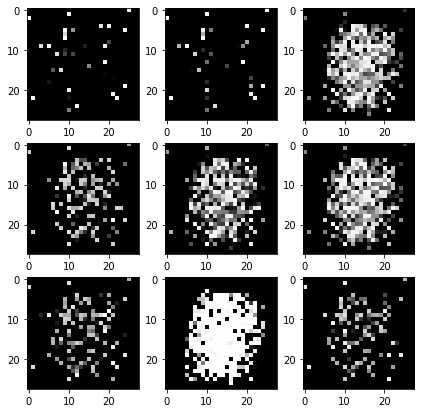

Epoch:50, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.689
Epoch:50, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.741
Epoch:50, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.812
Epoch:50, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.743
Epoch:50, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.709
Epoch:50, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.733
Epoch:50, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.540
Epoch:50, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:23.540
Epoch:50, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.802
Epoch:50, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:23.735
Epoch:51, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.798
Epoch:51, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.732
Epoch:51, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.611
Epoch:51, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.675
Epoch:51, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.716
Epoch:51, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.82

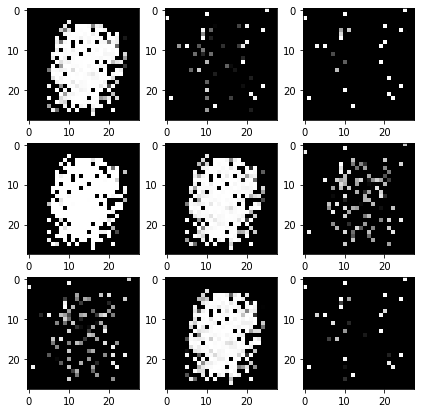

Epoch:55, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.869
Epoch:55, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.906
Epoch:55, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.968
Epoch:55, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.022
Epoch:55, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.066
Epoch:55, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.071
Epoch:55, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.995
Epoch:55, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:23.939
Epoch:55, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.749
Epoch:55, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.012
Epoch:56, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.043
Epoch:56, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.072
Epoch:56, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.964
Epoch:56, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.154
Epoch:56, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.921
Epoch:56, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.10

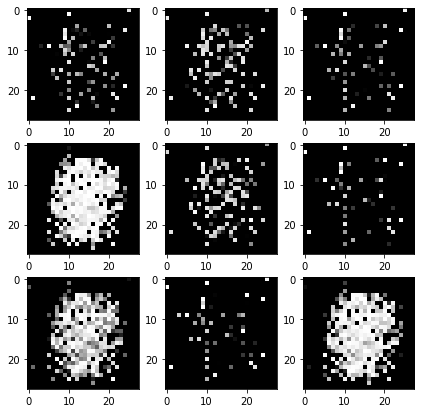

Epoch:60, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.096
Epoch:60, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.958
Epoch:60, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.239
Epoch:60, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.229
Epoch:60, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.053
Epoch:60, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.151
Epoch:60, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.118
Epoch:60, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.087
Epoch:60, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.102
Epoch:60, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.225
Epoch:61, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.124
Epoch:61, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.169
Epoch:61, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.320
Epoch:61, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.090
Epoch:61, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.315
Epoch:61, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.98

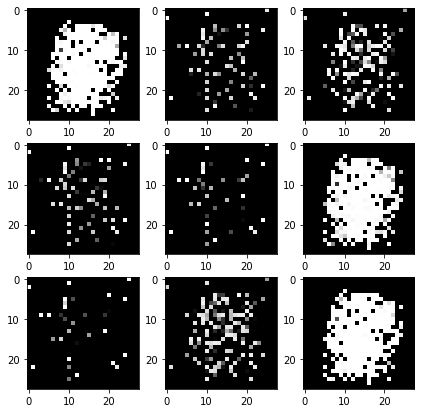

Epoch:65, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.297
Epoch:65, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.300
Epoch:65, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.334
Epoch:65, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.326
Epoch:65, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.089
Epoch:65, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.185
Epoch:65, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.324
Epoch:65, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.332
Epoch:65, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.222
Epoch:65, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.287
Epoch:66, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.201
Epoch:66, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.262
Epoch:66, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.312
Epoch:66, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.236
Epoch:66, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.223
Epoch:66, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.32

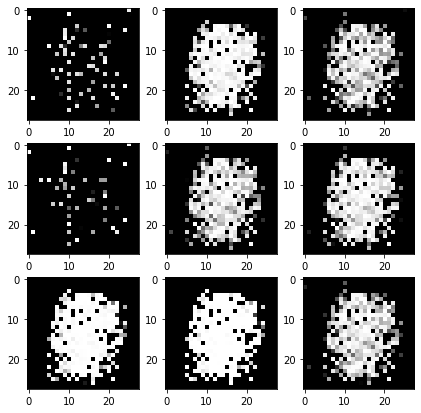

Epoch:70, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.259
Epoch:70, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.203
Epoch:70, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.264
Epoch:70, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.360
Epoch:70, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.470
Epoch:70, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.520
Epoch:70, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.295
Epoch:70, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.465
Epoch:70, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.434
Epoch:70, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.262
Epoch:71, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.430
Epoch:71, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.477
Epoch:71, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.345
Epoch:71, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.329
Epoch:71, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.534
Epoch:71, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.35

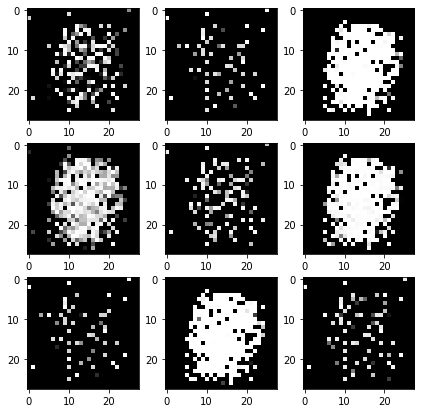

Epoch:75, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.490
Epoch:75, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.349
Epoch:75, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.367
Epoch:75, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.561
Epoch:75, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.601
Epoch:75, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.479
Epoch:75, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.586
Epoch:75, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.307
Epoch:75, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.445
Epoch:75, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.433
Epoch:76, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.513
Epoch:76, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.483
Epoch:76, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.620
Epoch:76, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.409
Epoch:76, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.387
Epoch:76, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.49

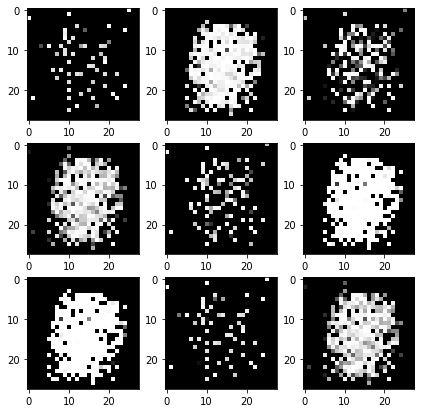

Epoch:80, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.431
Epoch:80, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.503
Epoch:80, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.552
Epoch:80, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.578
Epoch:80, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.601
Epoch:80, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.485
Epoch:80, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.509
Epoch:80, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.462
Epoch:80, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.400
Epoch:80, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.503
Epoch:81, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.544
Epoch:81, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.484
Epoch:81, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.546
Epoch:81, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.439
Epoch:81, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.505
Epoch:81, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.39

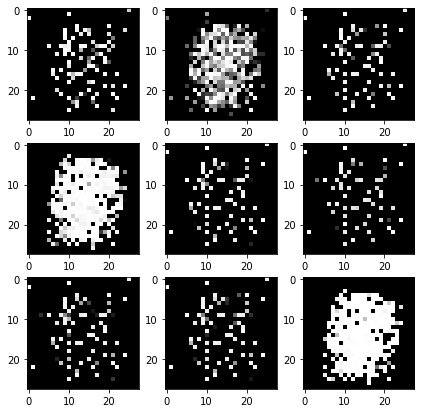

Epoch:85, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.552
Epoch:85, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.679
Epoch:85, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.432
Epoch:85, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.592
Epoch:85, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.619
Epoch:85, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.509
Epoch:85, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.532
Epoch:85, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.399
Epoch:85, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.417
Epoch:85, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.561
Epoch:86, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.716
Epoch:86, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.563
Epoch:86, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.678
Epoch:86, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.604
Epoch:86, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.861
Epoch:86, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.64

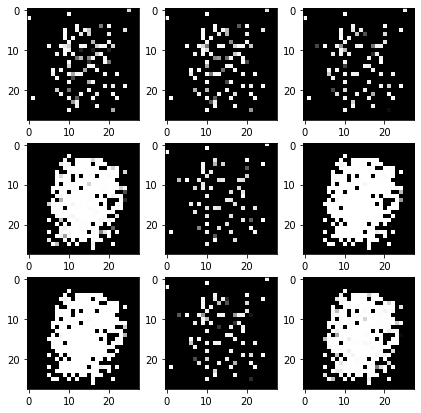

Epoch:90, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.770
Epoch:90, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.592
Epoch:90, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.662
Epoch:90, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.675
Epoch:90, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.630
Epoch:90, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.731
Epoch:90, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.654
Epoch:90, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.635
Epoch:90, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.622
Epoch:90, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.641
Epoch:91, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.883
Epoch:91, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.573
Epoch:91, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.596
Epoch:91, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.813
Epoch:91, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.819
Epoch:91, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.62

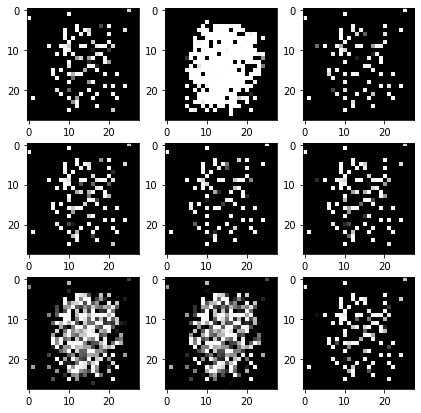

Epoch:95, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.815
Epoch:95, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.715
Epoch:95, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.698
Epoch:95, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.916
Epoch:95, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.670
Epoch:95, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:25.010
Epoch:95, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.697
Epoch:95, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.748
Epoch:95, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.823
Epoch:95, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.776
Epoch:96, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.756
Epoch:96, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.801
Epoch:96, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.847
Epoch:96, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.920
Epoch:96, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.772
Epoch:96, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.86

In [11]:
epochs = 100
batch_size = 100
steps = 500
noise_size = 50

losses_d = []
losses_g = []

for i in range(0, epochs):
    hist_d = []
    hist_g = []
    if (i%5 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)
        
        hist_d.append(loss_d[0])
        hist_g.append(loss_g)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            
    losses_d.append(np.mean(hist_d))
    losses_g.append(np.mean(hist_g))

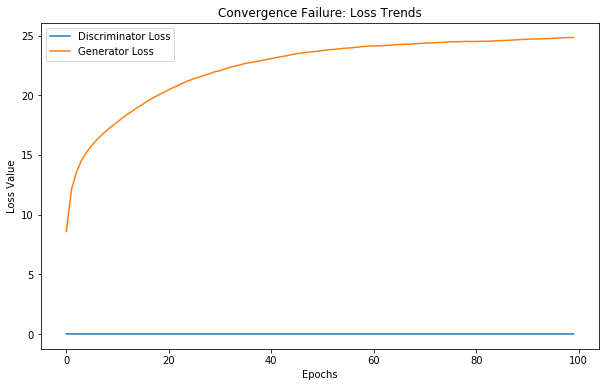

In [15]:
epochs = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d)
plt.plot(losses_g)
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title("Convergence Failure: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()